### 过拟合与欠拟合

In [1]:
import numpy as np

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
from pydatas

In [54]:
n_dots = 20
x = np.linspace(0,1,n_dots)
y = np.sqrt(x) + 0.4* np.random.rand(n_dots) -.1

In [55]:
import matplotlib.pyplot as plt

Text(0.5,1,'欠拟合')

Text(0.5,1,'可以')

Text(0.5,1,'过拟合')

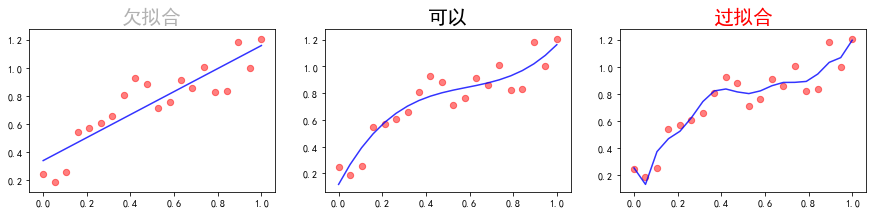

In [63]:
plt.rcParams['font.sans-serif'] = ['Simhei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

plt.figure(figsize=(15,3))
ax = plt.subplot(1,3,1)
n=1
p = np.poly1d(np.polyfit(x,y,n))
ax.scatter(x,y,40,'r',alpha=.5)
ax.plot(x,p(x),'b-',alpha=.8)
plt.title("欠拟合",fontsize=20,alpha=.3)

bx=plt.subplot(1,3,2)
n=3
p = np.poly1d(np.polyfit(x,y,n))
bx.scatter(x,y,40,'r',alpha=.5)
bx.plot(x,p(x),'b-',alpha=.8)
plt.title("可以",fontsize=20)

cx=plt.subplot(1,3,3)
n=10
p = np.poly1d(np.polyfit(x,y,n))
cx.scatter(x,y,40,'r',alpha=.5)
cx.plot(x,p(x),'b-',alpha=.8)
plt.title("过拟合",fontsize=20,alpha=1,color='r')

### 学习曲线

In [64]:
n_dots = 200
x = np.linspace(0,1,n_dots)
y = np.sqrt(x) + 0.2* np.random.rand(n_dots) -.1

In [65]:
# 因为sklearn的接口需要用到n_sample x n_feature的矩阵，
#需要转换为 200 X 1的矩阵
X = x.reshape(-1,1)
y = y.reshape(-1,1)

#### 在sklear里，需要用Pipeline 来构造多项式模型

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#### polynomial_moedl() 函数生成一个多项式模型，其中degree 表示多项式的阶数

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    return pipeline

在scikit-learn中，我们用自己实现学习曲线的算法，直接使用**sklearn.model_selection.learning_curve() 函数来画出学习曲线**，他会自动把训练样本数量按照预定的规则逐渐增加，然后画出不同训练样本数量时的模型准确性

<module 'matplotlib.pyplot' from '/home/zyc/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

<module 'matplotlib.pyplot' from '/home/zyc/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

<module 'matplotlib.pyplot' from '/home/zyc/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

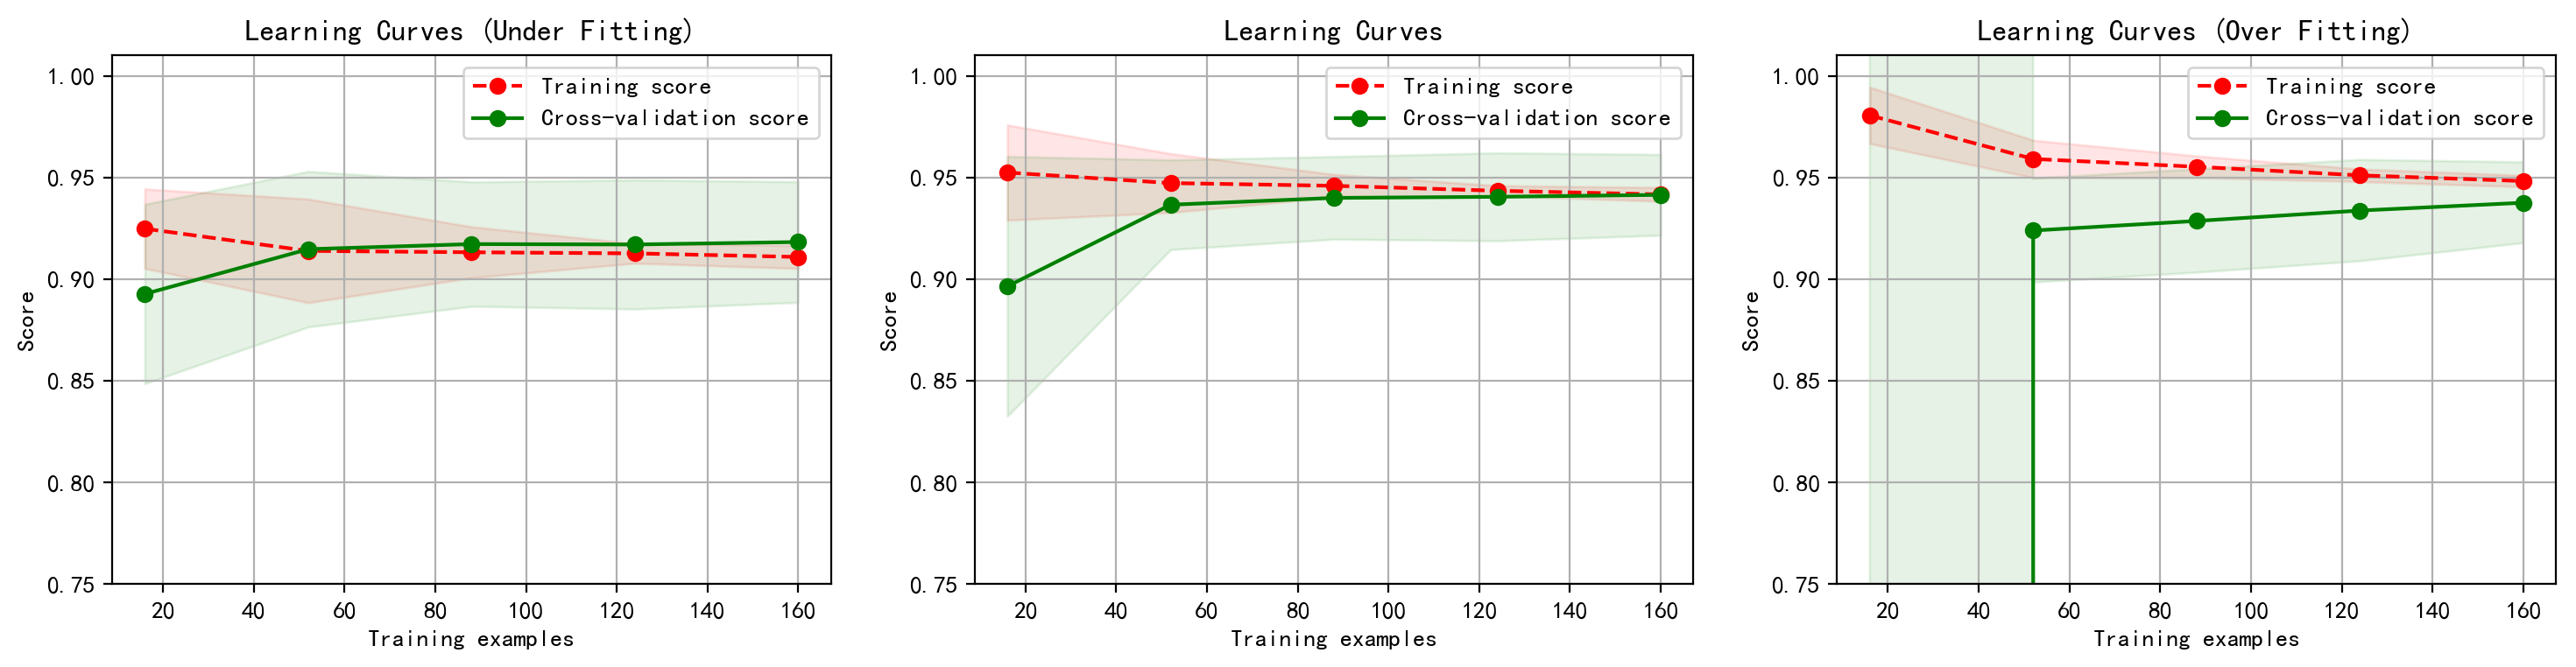

In [123]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 为了让学习曲线更平滑，交叉验证数据集的得分计算 10 次，每次都重新选中 20% 的数据计算一遍
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
titles = ['Learning Curves (Under Fitting)',
          'Learning Curves',
          'Learning Curves (Over Fitting)']
degrees = [1, 3, 10]

plt.figure(figsize=(18, 4), dpi=200)
for i in range(len(degrees)):
    plt.subplot(1, 3, i + 1)
    plot_learning_curve(polynomial_model(degrees[i]), titles[i], X, y, ylim=(0.75, 1.01), cv=cv)

plt.show()

<module 'matplotlib.pyplot' from '/home/zyc/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

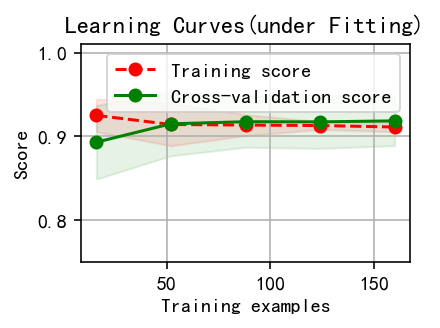

<module 'matplotlib.pyplot' from '/home/zyc/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

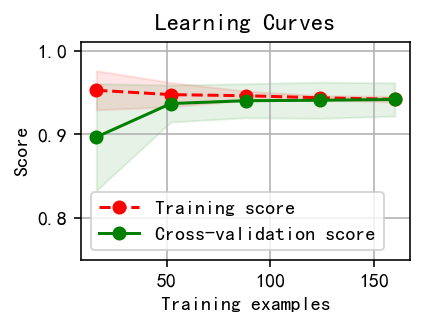

<module 'matplotlib.pyplot' from '/home/zyc/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

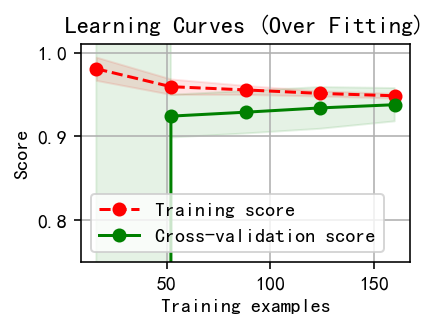

In [127]:
#为了让学习曲线更平滑，计算10次交叉验证数据集的分数
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
titles = ['Learning Curves(under Fitting)',
          'Learning Curves',
          'Learning Curves (Over Fitting)']
degrees = [1,3,10]


for i in range(len(degrees)):
    plt.figure(figsize=(10,2),dpi=144)
    plt.subplot(1,3,i+1)
    plot_learning_curve(polynomial_model(degrees[i]),titles[i],X,y,ylim=(0.75,1.01),cv=cv)
    plt.show()

## 查准率【Presision】和召回率【Recall】

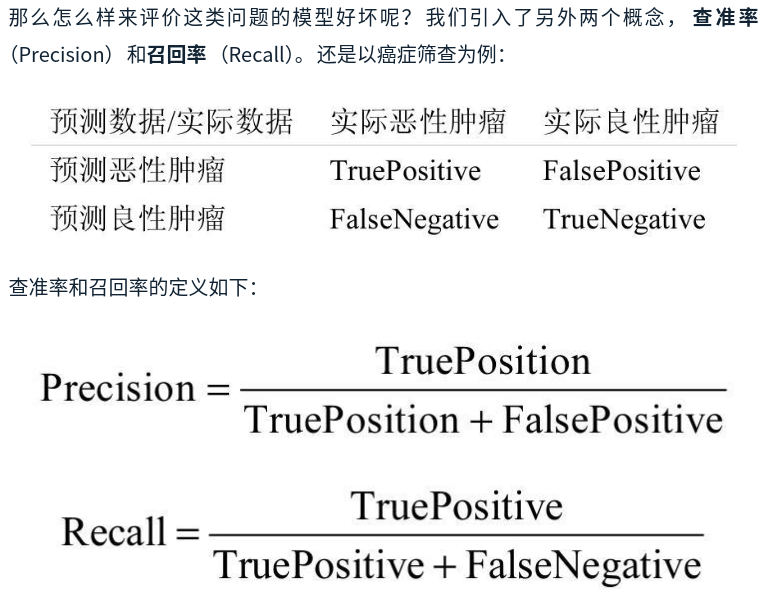

scikit-learn 里模型评估算法都在sklean.mertics 包中
    其中**查准率**和**召回率**的API分别是：  
    查准率：**sklean.metrics.precision_score()**  
    召回率：**sklean.metricsrecall_score()**

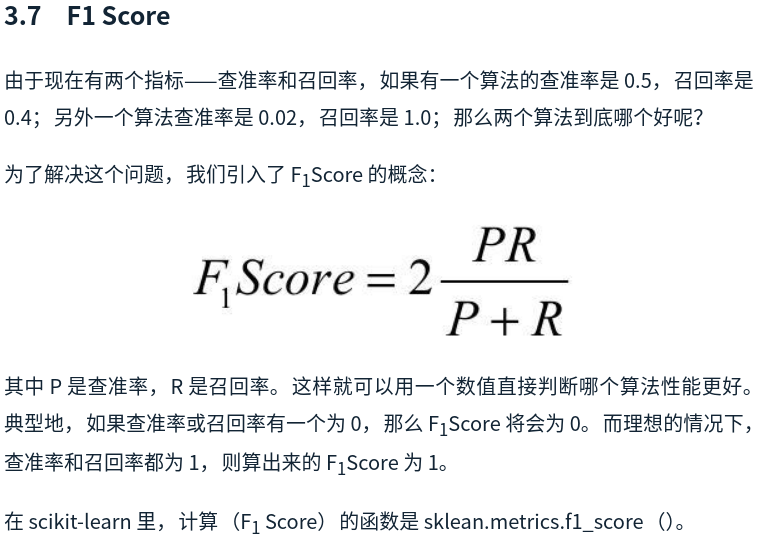